In [1]:
dll_dir = r"C:\Users\abdul\Desktop\TUM\thesis\openslide-win64-20221111\bin"

import os
with os.add_dll_directory(dll_dir):
    from openslide import OpenSlide
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt, patches
import json

- OpenSlide is used for reading whole slide images and creating patches.

In [2]:
# read in sample image and display some info

image_dir = "openslide sample images"
image = OpenSlide(os.path.join(image_dir, os.listdir(image_dir)[0]))
print("image level count:", image.level_count)
print("image level dimensions:", image.level_dimensions)
print("image level downsamples:", image.level_downsamples)

image level count: 3
image level dimensions: ((46000, 32893), (11500, 8223), (2875, 2055))
image level downsamples: (1.0, 4.000060805058981, 16.003163017031632)


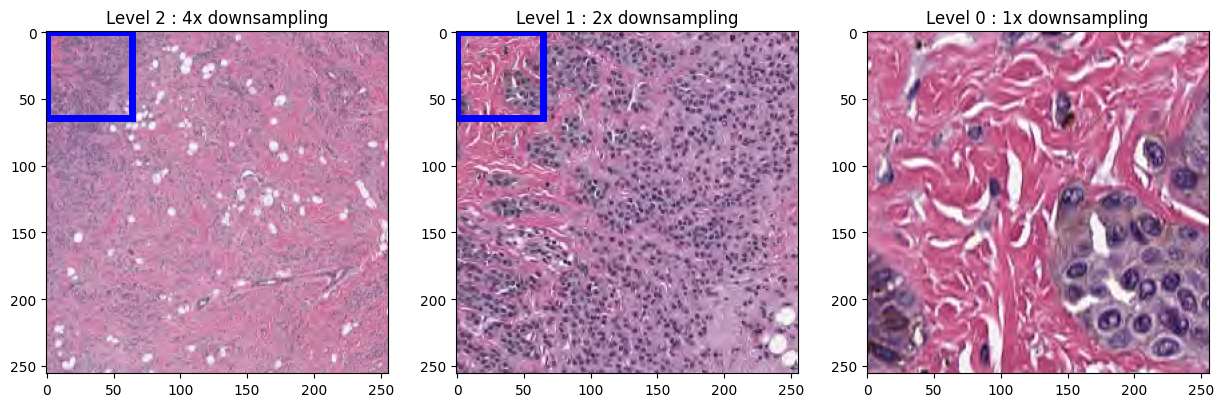

In [3]:
# display regions in the WSI with varying magnification

location = (4000, 20000)  # top left pixel coordinates in the level 0 reference frame
size = (256, 256)  # region size
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for idx, ax in enumerate(axes):
    level = 2 - idx # level number, 0 is highest magnification
    ax.imshow(image.read_region(location, level, size))
    if level:
        ax.add_patch(patches.Rectangle((0, 0), 64, 64, linewidth=5, edgecolor='b', facecolor='none'))
    ax.set_title(f"Level {level} : {2**level}x downsampling")
plt.show()

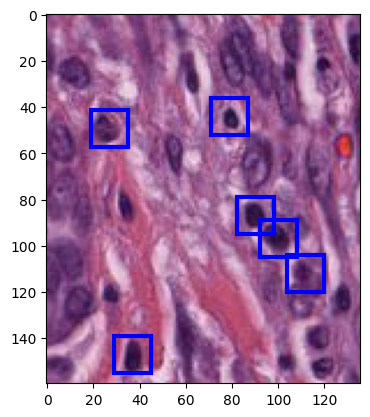

In [7]:
# display a sample ROI in TIGER challenge data with lymphocytes and plasma cells annotations

with open(r'..\tiger_fork\tiger data\tiger-coco.json', 'r') as f:
    annotations = json.load(f)

image_id = 16  # we are interested in the image with id 16
image_name = os.path.basename(annotations["images"][image_id]["file_name"])
bboxes = [  # bounding boxes for lymphocytes and plasma cells
    item for item in annotations["annotations"] 
    if item["image_id"] is image_id
]  
plt.figure()
plt.imshow(Image.open(os.path.join("..", "tiger_fork", "tiger data", "images", image_name)))
for bbox in bboxes:
    x, y, w, h = bbox["bbox"]
    plt.gca().add_patch(patches.Rectangle((x, y), w, h, linewidth=3, edgecolor='b', facecolor='none'))
plt.show()